In [44]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from crk65 import rk_error_control

In [45]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

def plot_shape_of_errors(continuous_sol, solution, name):
    minimum_step_size = 1e-5
    errors_small_steps = []
    plt.figure()
    for interp in continuous_sol.interps:
        num_points = 100
        pts_to_sample = create_t_eval(interp.x_i, interp.x_i_plus_1, num_points)
        errors = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            interp_eval = interp.eval(pt)
            errors.append( abs(interp_eval - y) )
        maximum_error = max(errors)
        plot_vals = [ error/ maximum_error for error in errors]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (interp.x_i_plus_1 - interp.x_i < minimum_step_size):
            errors_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(interp.x_i)}_{str(interp.x_i_plus_1)}")
    plt.title(f"{name} - plot of errors")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in errors_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of errors on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.show()

In [46]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (   res, 
        crk6_continous_sol,
        hb6_continous_sol,
        hb8_continous_sol) = rk_error_control(model, t_span, y0[0], tol)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp


    crk6_computed_solutions = [crk6_continous_sol.eval(x) for x in t_eval]
    hb6_computed_solutions = [hb6_continous_sol.eval(x) for x in t_eval]
    hb8_computed_solutions = [hb8_continous_sol.eval(x) for x in t_eval]
    actual_solutions = solution(t_eval)

    plt.figure()
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, crk6_computed_solutions, label="crk6")
    plt.plot(t_eval, hb6_computed_solutions, label="hb6")
    plt.plot(t_eval, hb8_computed_solutions, label="hb8")
    plt.plot(t_eval, actual_solutions, label="solution")
    plt.title("solution vs interpolants")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    crk6_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(crk6_computed_solutions, actual_solutions)]
    hb6_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(hb6_computed_solutions, actual_solutions)]
    hb8_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(hb8_computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, crk6_error, label="crk6 error")
    plt.plot(t_eval, hb6_error, label="hb6 error")
    plt.plot(t_eval, hb8_error, label="hb8 error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    plot_shape_of_errors(crk6_continous_sol, solution, "crk6")
    plot_shape_of_errors(hb6_continous_sol , solution, "hb6")
    plot_shape_of_errors(hb8_continous_sol , solution, "hb8")

    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

nsteps = 17
nsuccessful_steps = 17
integration complete


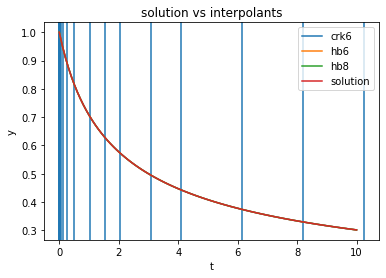

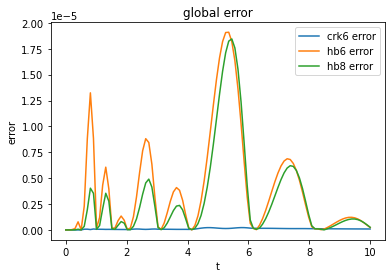

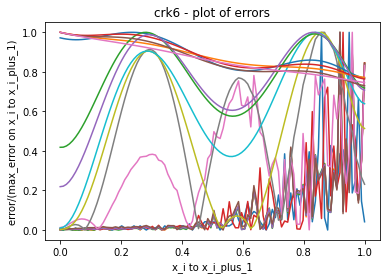

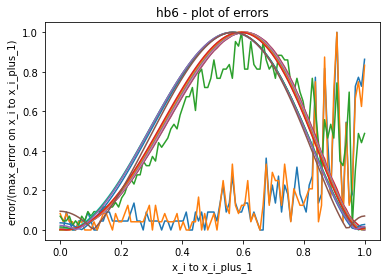

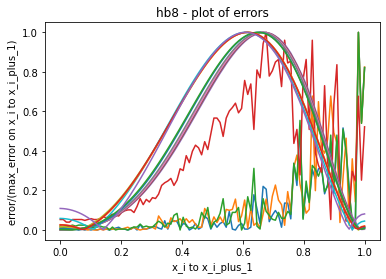

0.0
0.0
2.220446049250313e-16
3.3306690738754696e-16
4.440892098500626e-16
1.3322676295501878e-15
6.661338147750939e-15
3.3306690738754696e-15
6.208478176006338e-12
9.865982475432133e-10
6.158271947942495e-08
4.867991398871396e-08
3.757573019402827e-08
6.44861877785452e-08
4.925646951425833e-08
1.5888999560509376e-07
1.160264726518534e-07
8.657258854238847e-08


In [47]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

nsteps = 30
nsuccessful_steps = 25
integration complete


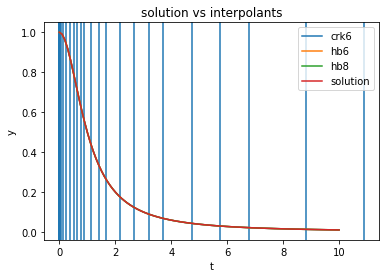

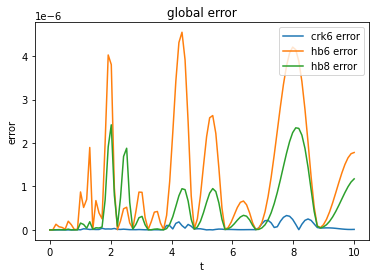

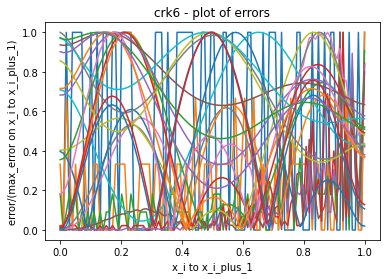

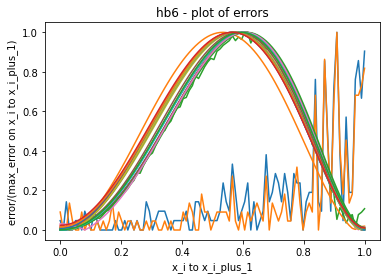

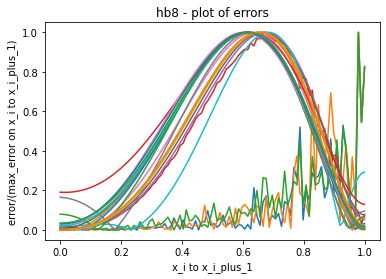

0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
7.549516567451064e-15
1.7135182162064666e-12
2.786937347565299e-10
3.2996383403371965e-10
1.9824419883462951e-10
9.367950859484608e-12
1.7617107772593954e-10
2.571962642861081e-10
1.508396940685941e-08
1.2771786128684681e-08
8.651968586015357e-09
1.743854655122945e-08
7.570919571819879e-09
3.824964373011497e-09
2.2093195051198222e-09
2.018491148531032e-08
1.0451402285283073e-08
5.492699749892749e-09
4.267191362067324e-08
1.9888382576244146e-08


In [48]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

nsteps = 24
nsuccessful_steps = 19
integration complete


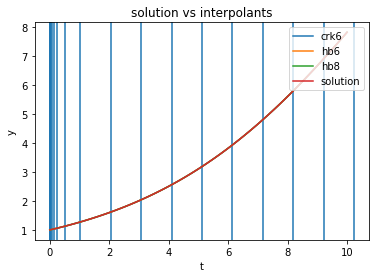

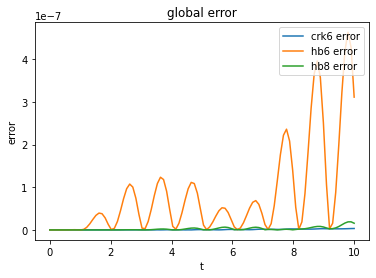

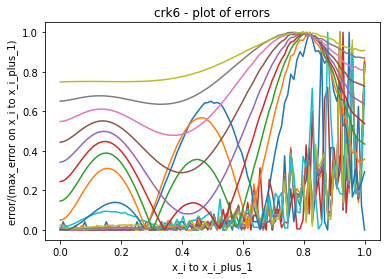

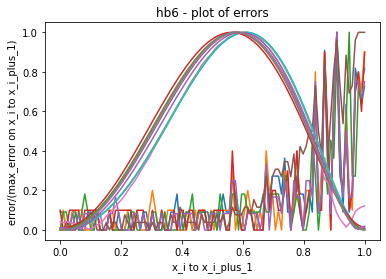

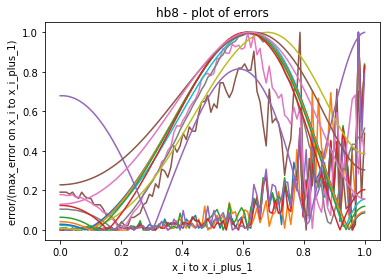

0.0
2.220446049250313e-16
0.0
0.0
2.220446049250313e-16
0.0
0.0
3.9968028886505635e-15
9.769962616701378e-15
4.063416270128073e-14
1.9317880628477724e-13
9.887424212706719e-12
6.372591343506429e-11
1.8968560056009665e-10
4.203832837390564e-10
7.836171711517181e-10
1.2875558397240638e-09
1.8958514758082856e-09
2.52333176575803e-09
3.045641960852663e-09


In [49]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

nsteps = 803
nsuccessful_steps = 621
integration complete


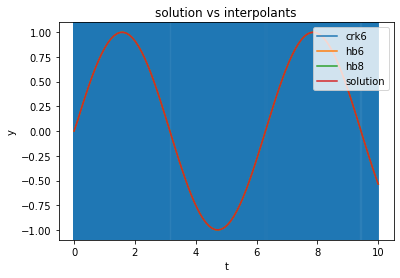

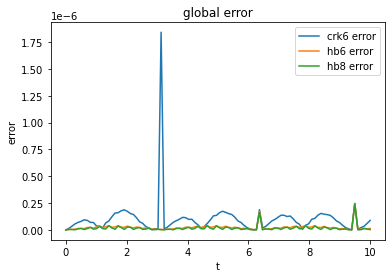

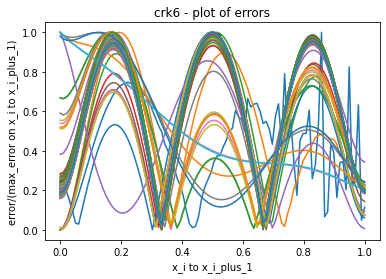

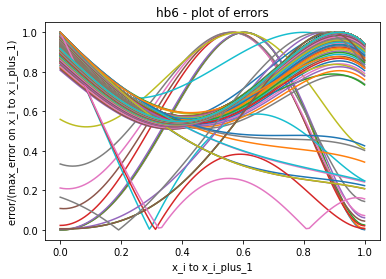

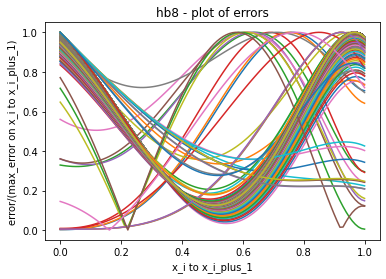

0.0
1.7625739192825285e-16
7.87670709906374e-14
1.849013650523368e-11
2.73700752600331e-09
2.4566123094094117e-09
7.626682033481935e-08
3.1495811549098196e-08
1.0807288869374432e-08
4.673115824860297e-09
3.4327832798553004e-09
3.574563381403273e-09
4.074520457142405e-09
4.661886265910908e-09
5.269322173040436e-09
5.8801286617615744e-09
6.490785936508203e-09
7.100042720420419e-09
7.70727634491486e-09
8.31275007162624e-09
8.916148486193265e-09
9.517111432266745e-09
1.0115620063810837e-08
1.0711544318198207e-08
1.1304876201823078e-08
1.1895196161404442e-08
1.2482488653819956e-08
1.3066559667596067e-08
1.3647448449116695e-08
1.422463069555846e-08
1.4798301861684848e-08
1.5368258055037387e-08
1.5934032482345373e-08
1.649594139063737e-08
1.705357816073061e-08
1.76068327140122e-08
1.8155409842179893e-08
1.8699818360445875e-08
1.9238784565445144e-08
1.977327457325373e-08
2.030245060957725e-08
2.0826660285244714e-08
2.13455239039817e-08
2.1858827525811364e-08
2.2366395291406604e-08
2.2868432592

In [50]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

nsteps = 585
nsuccessful_steps = 332
integration complete


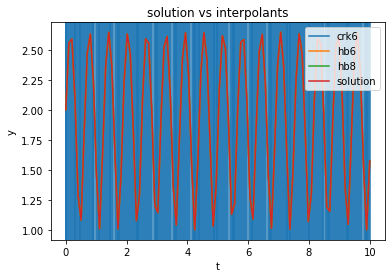

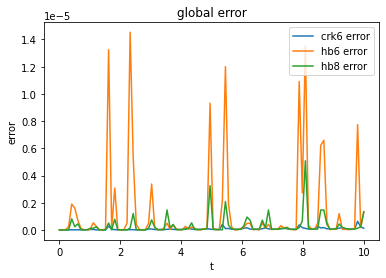

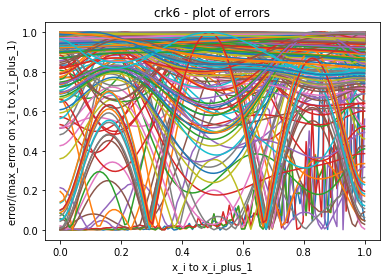

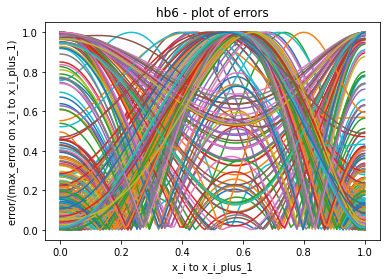

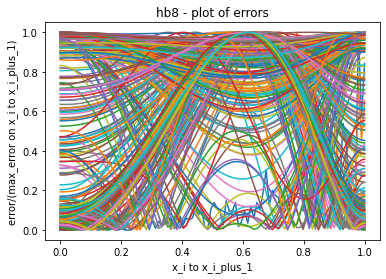

0.0
0.0
8.881784197001252e-16
3.552713678800501e-15
6.217248937900877e-15
3.9035441545820504e-13
7.755973641110359e-11
1.1235723462732494e-10
1.3379919394651552e-10
1.5150902754612616e-10
1.69869895927377e-10
1.9209833723721204e-10
2.222981798638557e-10
2.682698507783243e-10
3.490905342573569e-10
5.162212879383787e-10
8.118370420362453e-10
1.9469825751627923e-10
5.543534520313642e-09
5.617607712338213e-09
5.3240230002415956e-09
4.914960438640037e-09
1.1999314875055234e-09
7.244518318572091e-09
9.661260680360328e-09
9.301966752417457e-09
8.570611331748523e-09
7.971110882465382e-09
7.56099449716885e-09
7.327004336588061e-09
7.254448597393548e-09
7.3392856236864645e-09
7.591216100166776e-09
8.037187360088183e-09
8.727899736271638e-09
9.752281870945012e-09
2.0459049343557467e-08
2.5182249618893593e-08
3.524018588052513e-08
3.679750659735248e-08
3.6930124958090005e-08
3.5692350630611713e-08
1.8128621714907922e-08
9.779016485467196e-09
4.116516016949845e-09
2.4817343735605846e-09
1.928365467

In [51]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

nsteps = 19
nsuccessful_steps = 19
integration complete


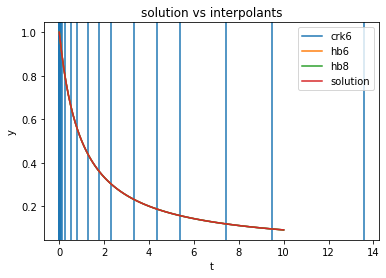

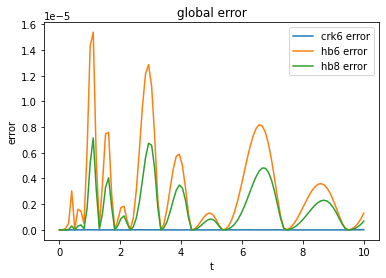

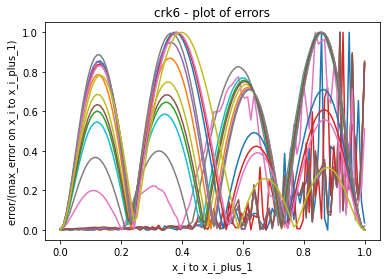

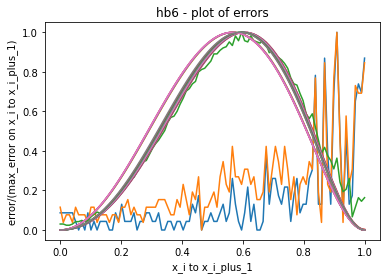

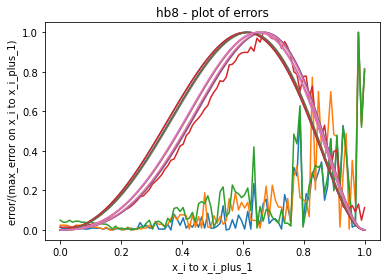

0.0
2.220446049250313e-16
3.3306690738754696e-16
5.551115123125783e-16
1.1102230246251565e-15
1.6653345369377348e-15
7.105427357601002e-15
2.4646951146678475e-14
1.333377852574813e-13
3.6270986214503864e-13
5.273559366969494e-13
7.782663402622347e-13
7.173706073615449e-13
6.285527653915324e-13
6.075695502261169e-13
6.094291737923641e-13
5.608291608893978e-13
5.177386297461339e-13
4.1600056732704616e-13
4.0310810245358653e-13


In [52]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

nsteps = 40
nsuccessful_steps = 26
integration complete


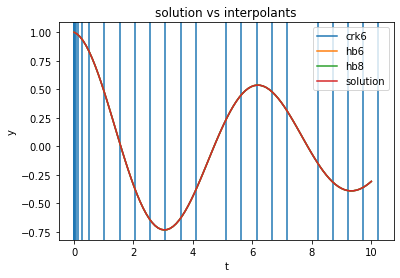

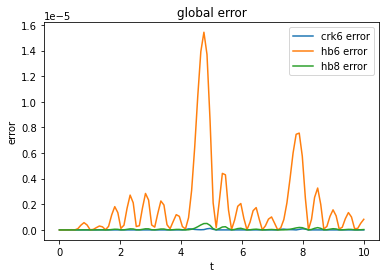

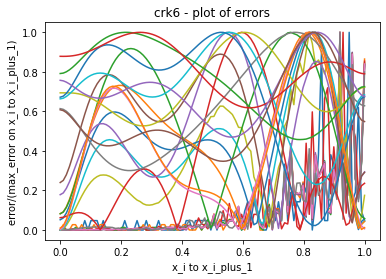

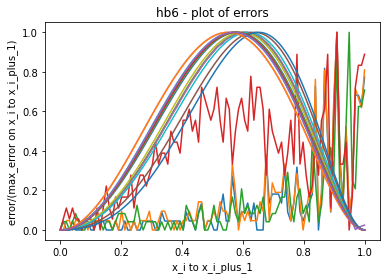

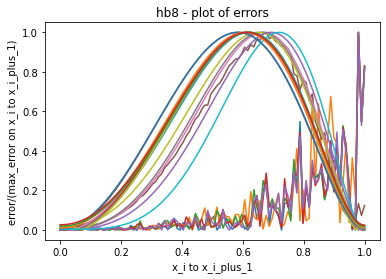

0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-15
1.5543122344752192e-15
3.7569947153315297e-13
7.460493334221496e-11
8.880701729552243e-11
4.694700184160183e-11
3.370892454057639e-11
1.2773970770041387e-10
2.0932722222255506e-10
2.5817525894922255e-10
7.502828913708015e-10
7.668315982201079e-10
7.978204763503527e-10
8.240105819901089e-10
8.297199038942438e-10
1.0636438674271886e-09
9.736720318898051e-10
8.751901980907917e-10
7.822149039604653e-10
7.065298346375926e-10


In [53]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

nsteps = 29
nsuccessful_steps = 25
integration complete


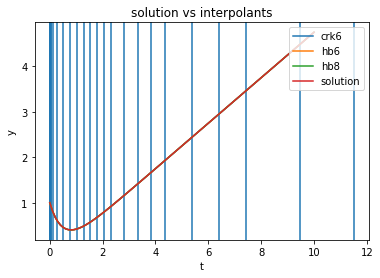

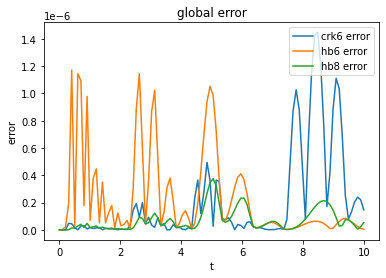

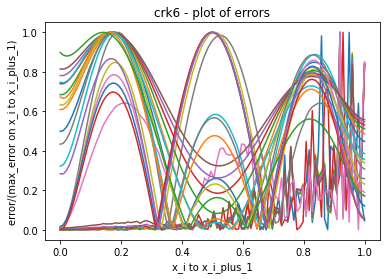

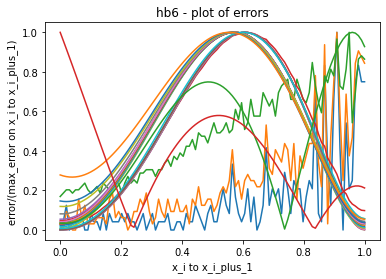

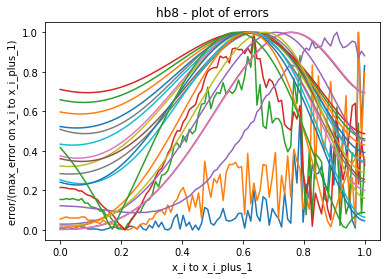

0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-15
3.774758283725532e-15
1.1102230246251565e-14
3.6637359812630166e-14
2.8332891588433995e-13
6.572031807650092e-11
1.3217249739128079e-08
1.581814385032132e-08
1.4212168220062438e-08
1.135320826239905e-08
8.503444948182448e-09
6.114281192459714e-09
4.274430254191941e-09
2.9271103318961877e-09
4.421187060899001e-08
3.137764803540222e-08
1.6834628135953267e-08
8.046827426611003e-09
6.042893874180777e-08
1.5430116739878486e-08
2.9711539895060923e-09
7.919807654133137e-08
1.684867534379464e-08


In [54]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [55]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)